In [2]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, "..")

import scipy.signal

from im_processing_fct.functions import *

import random

In [447]:

PathTemp = Path(
    "/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/MultiMaze_Spacer_Template.jpg")
VideoPath = Path(
    '/mnt/labserver/DURRIEU_Matthias/Experimental_data/Optogenetics/Optobot/MultiMazeBiS_15_Steel_Wax/Female_Starved_noWater/221116/102044_s0a0_p6-0/Small_Arena4/Arena4.mp4')

In [65]:
# Mac paths :

VideoPath = Path("/Users/ulric/Desktop/SampleDataMMTrack/Small_Arena6/Arena6.mp4")

# Get the first frame

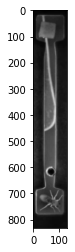

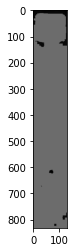

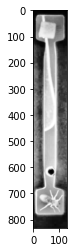

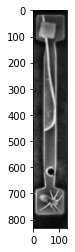

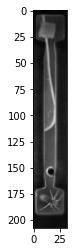

In [66]:

vidcap = cv2.VideoCapture(VideoPath.as_posix())
for i in range(1):
    success, im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

# Tryin uniform lighting
# Nathan solution
im_full_gray_unif = uniform_illumination(im_full_gray, bin_thresh=10)

plt.figure()
plt.imshow(im_full_gray_unif, cmap='gray', vmin=0, vmax=255)
# equalize hist

im_full_gray_eqh = cv2.equalizeHist(im_full_gray,)

plt.figure()
plt.imshow(im_full_gray_eqh, cmap='gray', vmin=0, vmax=255)

# Adaptive equalization

clahe = cv2.createCLAHE(clipLimit=2.0,
                        tileGridSize=(8,8))
im_full_gray_clahe = clahe.apply(im_full_gray,)

plt.figure()
plt.imshow(im_full_gray_clahe, cmap='gray', vmin=0, vmax=255)


im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

plt.figure()
plt.imshow(im_full_gray_resized, cmap='gray', vmin=0, vmax=255)

In [419]:
ctns = cv2.findContours(im_full_gray_clahe, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ctns = ctns[0] if len(ctns) == 2 else ctns[1]

In [422]:
for c in ctns :
    cv2.drawContours(im_full_gray_clahe, [c], 0, (255,255,255), -1)

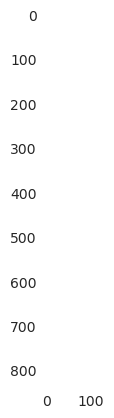

In [423]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
opening = cv2.morphologyEx(im_full_gray_clahe, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(im_full_gray_clahe, cmap='gray', vmin=0, vmax=255)

# Find the ball

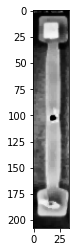

In [70]:
# Erode and dilate kernel to remove small noise that could be detected as ball

kernel= np.ones((2,2), np.uint8)
denoised = cv2.erode(im_full_gray_resized, kernel, iterations = 2)
denoised = cv2.dilate(denoised, kernel, iterations = 1)




plt.imshow(denoised, cmap='gray', vmin=0, vmax=255)


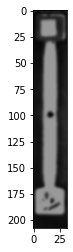

In [9]:
# Reduce the noise to avoid false circle detection

filt = cv2.GaussianBlur(im_full_gray_resized, (5,5), 0)
plt.imshow(filt, cmap='gray', vmin=0, vmax=255)

In [405]:
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)
#filt = cv2.medianBlur(im_full_gray_resized, 5)
rows = filt.shape[0]
circles = cv2.HoughCircles(filt, cv2.HOUGH_GRADIENT, 1, 125,
                           param1=40, param2=15,
                           minRadius=5, maxRadius=8)

In [406]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)

In [407]:
cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

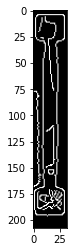

In [67]:
im_full_gray_resized = cv2.resize(im_full_gray_eqh, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)
# Erode and dilate kernel to remove small noise that could be detected as ball

kernel= np.ones((2,2), np.uint8)
denoised = cv2.erode(im_full_gray_resized, kernel, iterations = 3)
denoised = cv2.dilate(denoised, kernel, iterations = 2)
# Reduce the noise to avoid false circle detection

filt = cv2.GaussianBlur(im_full_gray_resized, (5,5), 0)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)

param1=200
param2=8

Edges = cv2.Canny(filt,param1, param2 )
plt.imshow(Edges, cmap='gray', vmin=0, vmax=255)


rows = filt.shape[0]
circles = cv2.HoughCircles(filt, cv2.HOUGH_GRADIENT, 1, 125,
                           param1=param1, param2=param2,
                           minRadius=0, maxRadius=3)

#Works with arena3 with clahe denoised and filtered image but failed on subsequent tests
#Works with area1 with unif denoised filtered image (mind the radius). Denoised was critical here.Also worked almost right away with arena2 changing only param2 from 10 to 9

# With hardcore uniform function only ball is visible and can be tracked with the transform on arena3. Makes too many "circle-ish" shapes.

# Eqh is promising with arena1.

# Eqh + radius control very narrow + no denoise works for Arena1, 2,3, 4, 5,6  oyeah


In [68]:

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (0, 255, 255), 3)
cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Try with same params, different image

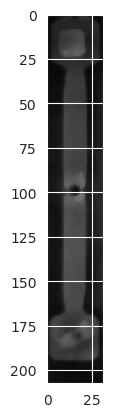

In [380]:
PathTemp = Path(
    "/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/MultiMaze_Spacer_Template.jpg")
VideoPath = Path(
    '/mnt/labserver/DURRIEU_Matthias/Experimental_data/Optogenetics/Optobot/MultiMazeBiS_15_Steel_Wax/Female_Starved_noWater/221116/102044_s0a0_p6-0/Small_Arena1/Arena1.mp4')
vidcap = cv2.VideoCapture(VideoPath.as_posix())
for i in range(1):
    success, im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

filt = cv2.medianBlur(im_full_gray_resized, 5)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)


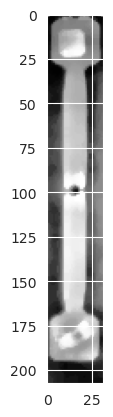

In [282]:
cont = cv2.equalizeHist(filt)
plt.imshow(cont, cmap='gray', vmin=0, vmax=255)


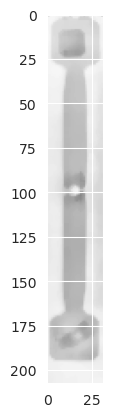

In [283]:
inv = (255 - im_full_gray_resized)
inv_filt = cv2.medianBlur(inv, 5)

plt.imshow(inv_filt, cmap='gray', vmin=0, vmax=255)

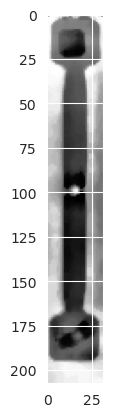

In [284]:
inv_filt_cont = cv2.equalizeHist(inv_filt)
plt.imshow(inv_filt_cont, cmap='gray', vmin=0, vmax=255)


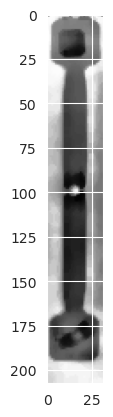

In [285]:
inv_cont = cv2.equalizeHist(inv)
plt.imshow(inv_cont, cmap='gray', vmin=0, vmax=255)
inv_cont_filt = cv2.medianBlur(inv_cont, 5)
plt.imshow(inv_cont_filt, cmap='gray', vmin=0, vmax=255)


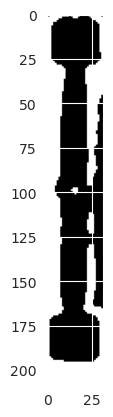

In [286]:
ret, bin = cv2.threshold(cont,100,255,cv2.THRESH_BINARY_INV)

plt.imshow(bin, cmap='gray', vmin=0, vmax=255)


In [287]:
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

filt = cv2.medianBlur(im_full_gray_resized, 5)
cont = cv2.equalizeHist(filt)


inv = (255 - im_full_gray_resized)
inv_filt = cv2.medianBlur(inv, 5)

inv_filt_cont = cv2.equalizeHist(inv_filt)

ret, bin = cv2.threshold(cont,100,255,cv2.THRESH_BINARY_INV)


rows = bin.shape[0]
circles = cv2.HoughCircles(bin, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=255, param2=7,
                           minRadius=0, maxRadius=4)


In [288]:

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)

cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

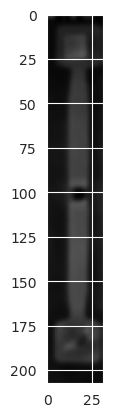

In [384]:
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)
# Erode and dilate kernel to remove small noise that could be detected as ball

kernel= np.ones((2,2), np.uint8)
denoised = cv2.erode(im_full_gray_resized, kernel, iterations = 3)
denoised = cv2.dilate(denoised, kernel, iterations = 1)
# Reduce the noise to avoid false circle detection

filt = cv2.GaussianBlur(denoised, (5,5), 0)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)

rows = filt.shape[0]
circles = cv2.HoughCircles(filt, cv2.HOUGH_GRADIENT, 1, 125,
                           param1=40, param2=12,
                           minRadius=0, maxRadius=10)

In [385]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)
cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Adapted parameters from first video with more erosion to get rid of legs and had to reduce param2 accordingly

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

# Test with a third video and new params

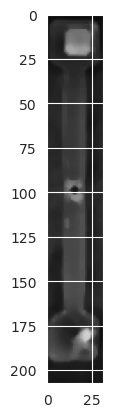

In [386]:
PathTemp = Path(
    "/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/MultiMaze_Spacer_Template.jpg")
VideoPath = Path(
    '/mnt/labserver/DURRIEU_Matthias/Experimental_data/Optogenetics/Optobot/MultiMazeBiS_15_Steel_Wax/Female_Starved_noWater/221116/102044_s0a0_p6-0/Small_Arena3/Arena3.mp4')
vidcap = cv2.VideoCapture(VideoPath.as_posix())
for i in range(1):
    success, im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

filt = cv2.medianBlur(im_full_gray_resized, 5)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

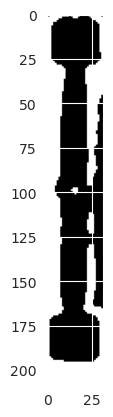

In [290]:
plt.imshow(bin, cmap='gray', vmin=0, vmax=255)


In [293]:

filt = cv2.medianBlur(im_full_gray_resized, 5)
cont = cv2.equalizeHist(filt)

inv = (255 - im_full_gray_resized)
inv_filt = cv2.medianBlur(inv, 5)

inv_filt_cont = cv2.equalizeHist(inv_filt)

ret, bin = cv2.threshold(cont, 100, 255, cv2.THRESH_BINARY_INV)

rows = bin.shape[0]
circles = cv2.HoughCircles(bin, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=255, param2=7,
                           minRadius=0, maxRadius=1)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)

cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

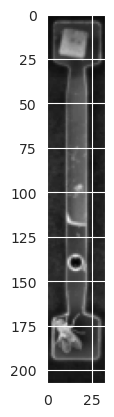

In [297]:
plt.imshow(im_full_gray_resized, cmap='gray', vmin=0, vmax=255)


In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurFrame = cv2.GaussianBlur(gray, (5, 5), 0)   #(5,5) is the kernel size, more or less blur

    circles = cv2.HoughCircles(blurFrame, cv2.HOUGH_GRADIENT, 1, 125, param1=40, param2=30, minRadius=10, maxRadius=30) #fourth argument distance between centers of circles
    #list of circles found are stored in circles                          param1 is sensitivity, if two high will detect not many circles, too low will detect too many circles
                                                                            #param2 is the minimum number of edges, the higher the more accurate the circle detection

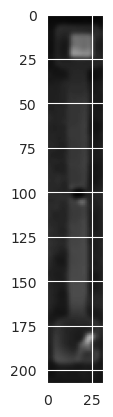

In [389]:
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)
# Erode and dilate kernel to remove small noise that could be detected as ball

kernel= np.ones((2,2), np.uint8)
denoised = cv2.erode(im_full_gray_resized, kernel, iterations = 3)
denoised = cv2.dilate(denoised, kernel, iterations = 1)
# Reduce the noise to avoid false circle detection

filt = cv2.GaussianBlur(denoised, (5,5), 0)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)

rows = filt.shape[0]
circles = cv2.HoughCircles(filt, cv2.HOUGH_GRADIENT, 1, 125,
                           param1=40, param2=11,
                           minRadius=0, maxRadius=10)

In [390]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)
cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Adapted parameters from first video with more erosion to get rid of legs and had to reduce param2 accordingly

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

# Tests with canny edge detection : param1 and param2 from hough circles is basicall same as canny edges

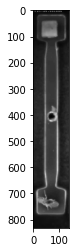

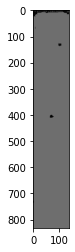

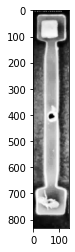

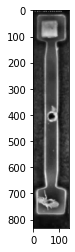

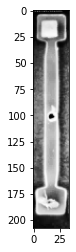

In [3]:
# Mac paths :

VideoPath = Path("/Users/ulric/Desktop/SampleDataMMTrack/Small_Arena2/Arena2.mp4")
vidcap = cv2.VideoCapture(VideoPath.as_posix())
for i in range(1):
    success, im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

# Tryin uniform lighting
# Nathan solution
im_full_gray_unif = uniform_illumination(im_full_gray, bin_thresh=10)

plt.figure()
plt.imshow(im_full_gray_unif, cmap='gray', vmin=0, vmax=255)
# equalize hist

im_full_gray_eqh = cv2.equalizeHist(im_full_gray,)

plt.figure()
plt.imshow(im_full_gray_eqh, cmap='gray', vmin=0, vmax=255)

# Adaptive equalization

clahe = cv2.createCLAHE(clipLimit=2.0,
                        tileGridSize=(8,8))
im_full_gray_clahe = clahe.apply(im_full_gray,)

plt.figure()
plt.imshow(im_full_gray_clahe, cmap='gray', vmin=0, vmax=255)


im_full_gray_resized = cv2.resize(im_full_gray_eqh, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

plt.figure()
plt.imshow(im_full_gray_resized, cmap='gray', vmin=0, vmax=255)

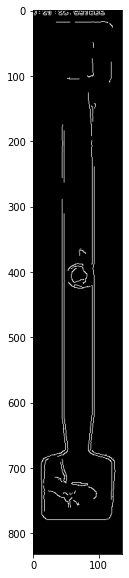

In [33]:
filtered = cv2.GaussianBlur(im_full_gray, (5,5), 0)
edges = cv2.Canny(im_full_gray, 200, 150)
plt.figure(figsize=(20,10))
plt.imshow(edges, cmap='gray', vmin=0, vmax=255)

# BackgroundSub

In [305]:
file = VideoPath

input_vidpath = file.as_posix()
output_vidpath = str(file).replace(file.stem, file.stem + "_tracked")
codec = "mp4v"

fgbg5 = cv2.bgsegm.createBackgroundSubtractorGSOC(
)

cap = cv2.VideoCapture(input_vidpath)

scaling = 1.0

# Set framesize as the same one as the images read from input video
BG_framesize = (
    int(cap.read()[1].shape[1] * scaling),
    int(cap.read()[1].shape[0] * scaling),
)

fourcc = cv2.VideoWriter_fourcc(*codec)
# Create a Video writer with the desired parameters
Background_Generator = cv2.VideoWriter(
    filename=file.parent.joinpath("Background_Generator2.mp4").as_posix(),
    fourcc=fourcc,
    fps=80,
    frameSize=BG_framesize,
    # isColor=True,
)

# Write a video with random frames taken in the input video
f = 0
while f <= 300:
    # get total number of frames
    totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    randomFrameNumber = random.randint(0, totalFrames)
    # set frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, randomFrameNumber)
    success, image = cap.read()

    if success:

        Background_Generator.write(image)

    f += 1

cap.release()
Background_Generator.release()
cv2.destroyAllWindows()

# Adjust using live rendering to get a clean background image. Default : 500

cap = cv2.VideoCapture(file.parent.joinpath( "Background_Generator2.mp4").as_posix())

target = 0
cap.set(
    1, target
)  # Set the starting point, try to find a section where the fly moves a lot.

Frame = target + 300

while 1:
    # read frames
    ret, img = cap.read()
    this = cap.get(1)

    # apply mask for background subtraction
    # fgbg5 is a GSOC background subtraction algorithm
    fgmask5 = fgbg5.apply(img)

    bg = fgbg5.getBackgroundImage()

    #cv2.imshow("Original", img)
    #cv2.imshow("GSOC", fgmask5)
    #cv2.imshow("background", bg)
    subtracted = cv2.absdiff(img, bg)

    if this == Frame:

        cv2.imwrite(file.parent.joinpath(file.stem+"_Background.jpg").as_posix(), bg)
        break

    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

file.parent.joinpath("Background_Generator2.mp4").unlink()